# 1) Step 1 EDA  :


# Exploratey data Analysis

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix

In [83]:
#loading dataset
df_train = pd.read_csv("/content/train (1).csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**there is a null in :**

* 1-Age
* 2-Cabin
* 3-Embarked

In [85]:
#total rows and columns dataset
df_train.shape

(891, 12)

In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**there is an outlier in the Fare column cuz the mean equals 32.204208 and the** **median equals 14.454200.so it's a big gap.**


In [88]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
df_train.isnull().sum() / len(df_train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**i'll drop the Cabin column cuz it has alot of missing values.**
**and replace the Age column with the median or mean in the data preprocessing **
**also Embarked has a little missing values.**

In [90]:
def data_info(data):
    cols = data.columns
    unique_values = [data[col].value_counts().head(10).index.to_array()for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({"col":cols,"dtype":dtypes,"n_uniques":n_uniques,"n_nan":nulss,"unique_val":unique_values,"duplicated":dup})

In [91]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [92]:
df_train["Survived"].value_counts().head().index.to_numpy()

array([0, 1])

In [93]:
df_train["Pclass"].value_counts().head().index.to_numpy()

array([3, 1, 2])

In [94]:
df_train["Sex"].value_counts().head().index.to_numpy()

array(['male', 'female'], dtype=object)

In [95]:
df_train["SibSp"].value_counts().head().index.to_numpy()

array([0, 1, 2, 4, 3])

In [96]:
df_train["Parch"].value_counts().head().index.to_numpy()

array([0, 1, 2, 5, 3])

In [97]:
df_train["Ticket"].value_counts().head().index.to_numpy()

array(['347082', 'CA. 2343', '1601', '3101295', 'CA 2144'], dtype=object)

In [98]:
df_train['Cabin'].value_counts().head().index.to_numpy()

array(['B96 B98', 'G6', 'C23 C25 C27', 'C22 C26', 'F33'], dtype=object)

In [99]:
df_train["Embarked"].value_counts().head().index.to_numpy()

array(['S', 'C', 'Q'], dtype=object)

now we got the info about every column we have in the data.
so the categorical columns are :  
* Survived
* Pclass
* Sex
* SibSp
* Parch
* Embarked


**categorical features in traning data**

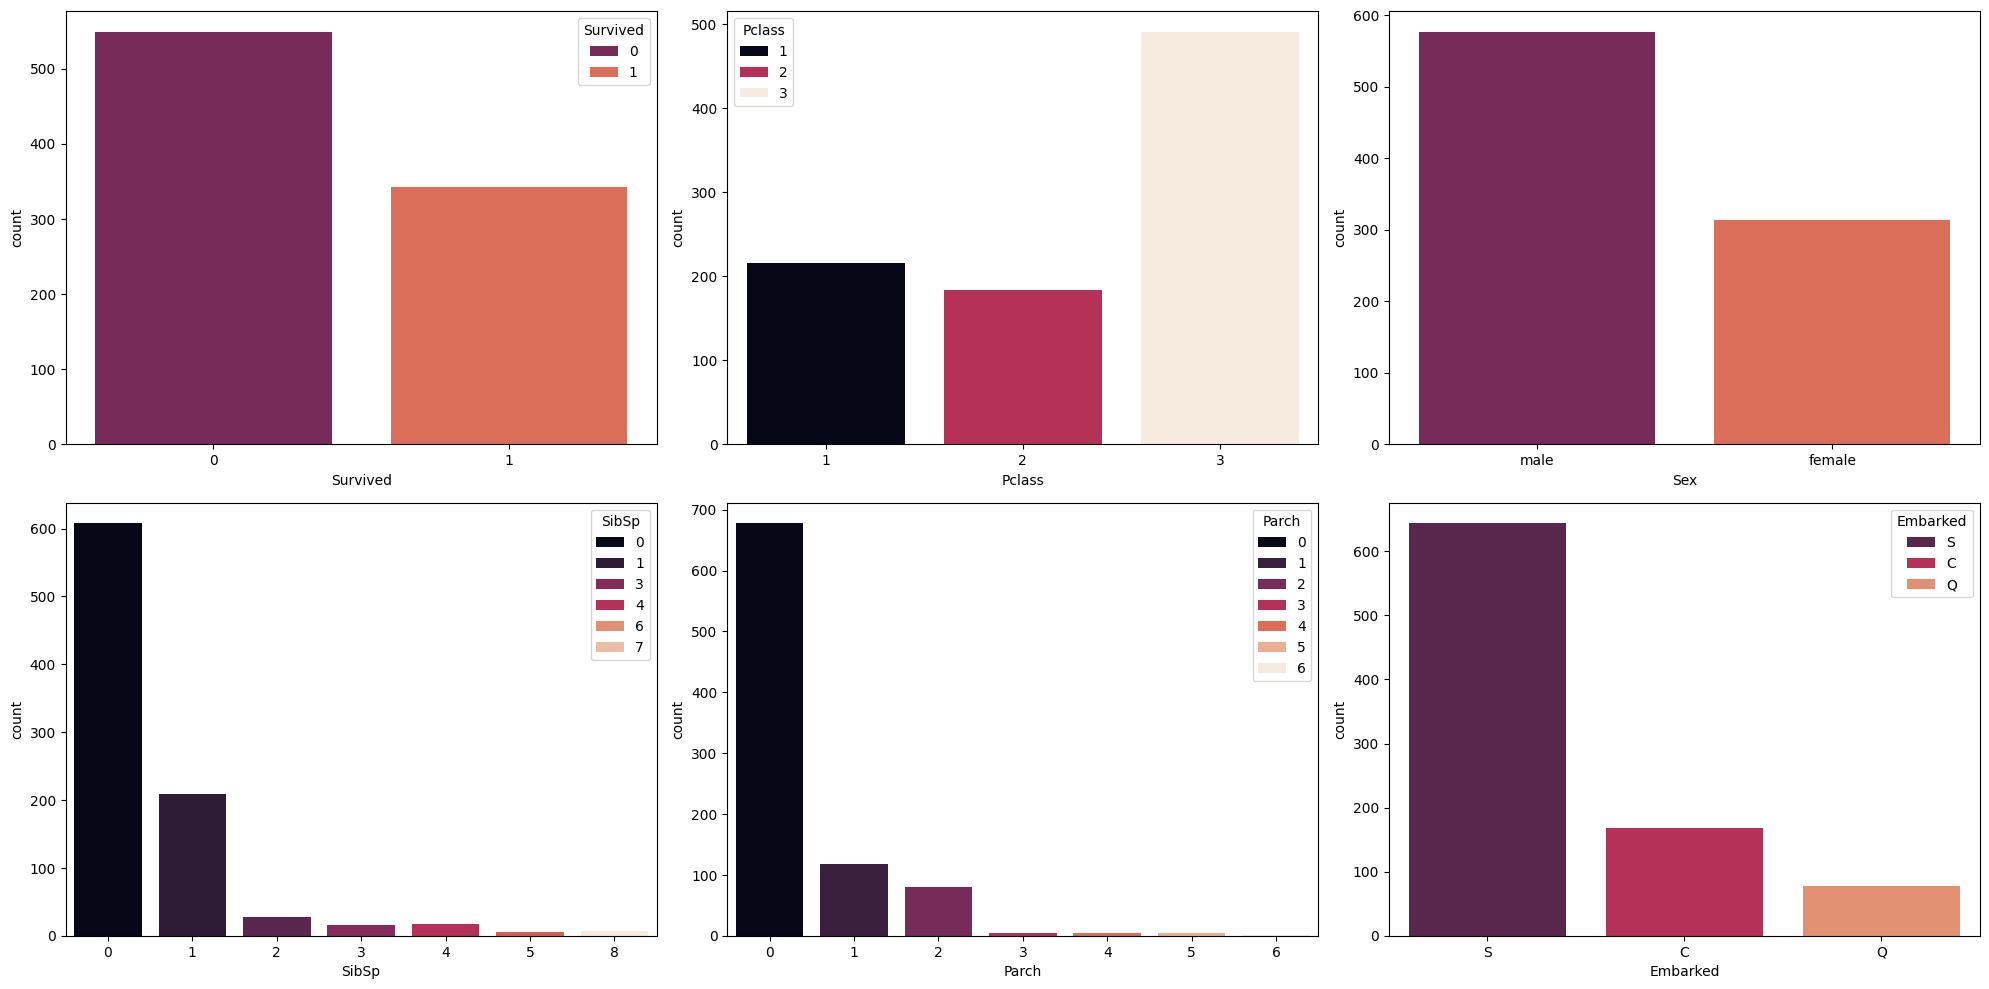

In [100]:
categorical_features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
plt.figure(figsize=(20,10))
for i in range (len(categorical_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.countplot(x = df_train[categorical_features[i]], palette = "rocket" , hue = df_train[categorical_features[i]])
plt.tight_layout()
plt.show()


**now we know which column is categorical** **and which one is numerical**

In [101]:
math.ceil(len(df_train.columns) / 3)

4

In [102]:
def categorical_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
      if len(data[column].unique()) < numbers_of_cat_value:
          plt.subplot(total_rows , total_cols , plot_index)
          sns.countplot(x=data[column], palette="rocket", hue=data[column])
          plt.title(f"count plot of {column}")
          plot_index += 1
      else:
           print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

column 'PassengerId' is not categorical.
column 'Name' is not categorical.
column 'Age' is not categorical.
column 'Ticket' is not categorical.
column 'Fare' is not categorical.
column 'Cabin' is not categorical.


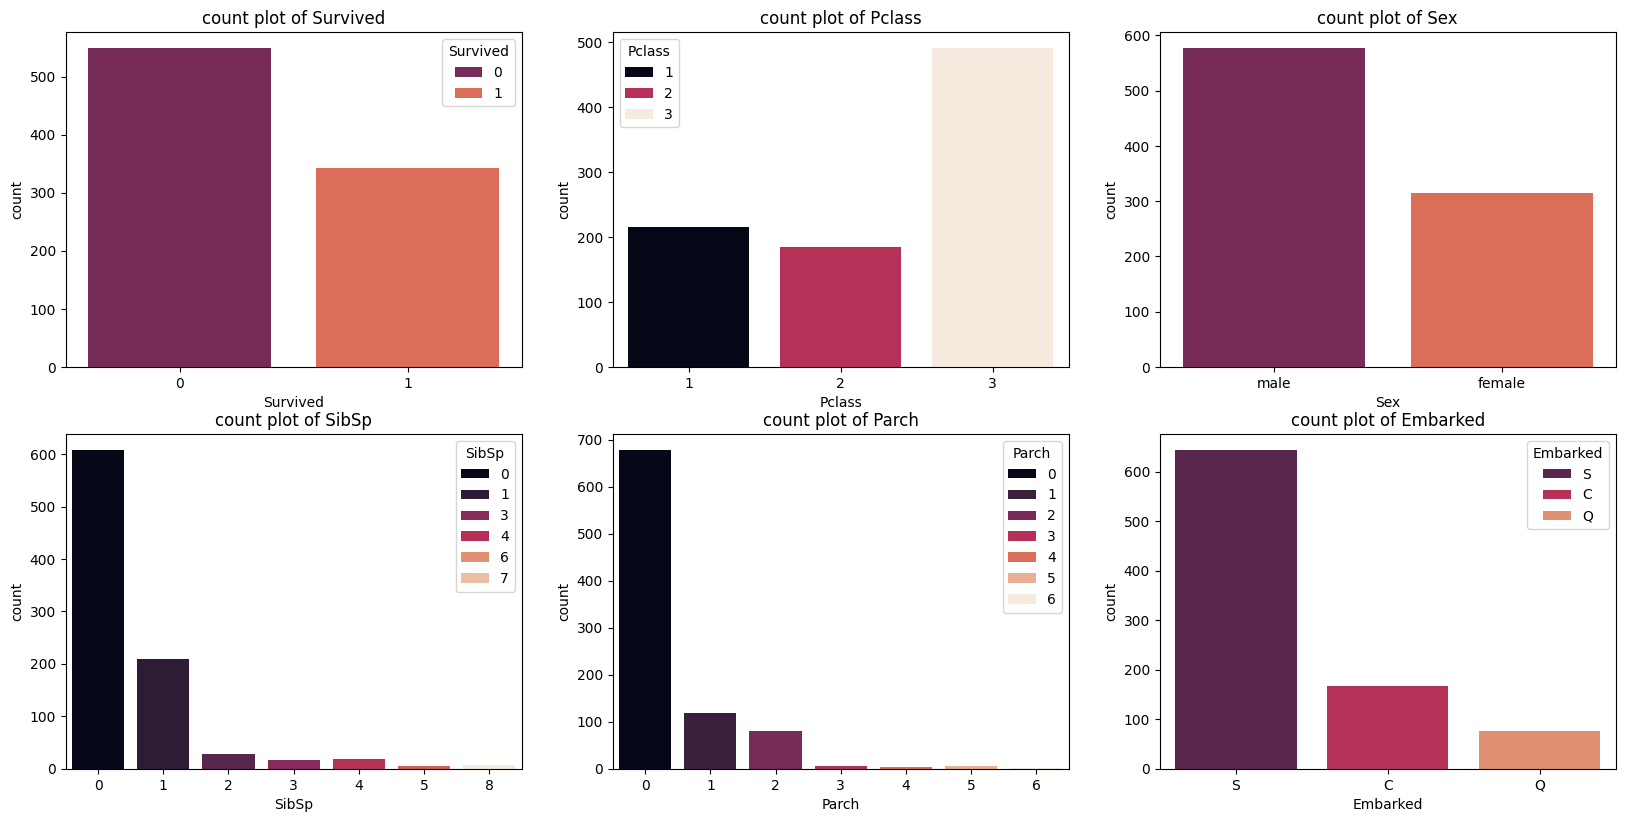

In [103]:
categorical_plot(df_train, df_train.columns, 10)



*   nerly 60% didn't survive.
*   most of people were from passenger "Class 3".
*  men are more than women.
*  people without siblings are more than any bar in this graph.
*  people without children or parents are more than any bar in this graph.
*  people with large number of Embarked are from "S".



**continuous features in training data**


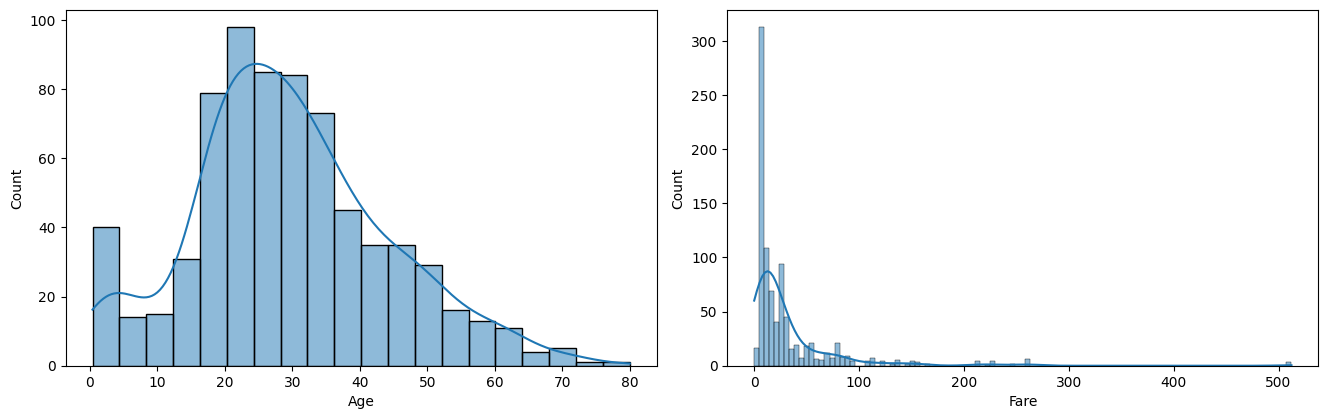

In [104]:
continuous_features = ["Age","Fare"]


plt.figure(figsize=(20,8))
for i in range(len(continuous_features)):
    plt.subplot(2 , 3 , i + 1)
    sns.histplot(df_train[continuous_features[i]],kde=True)
plt.tight_layout()
plt.show()



*   there is a large no. of people in between 15 and 50 years in the Age column.
*   in the second shape fare column has a right skewed disteribution so we have to scale it.



In [105]:
df_train.skew(numeric_only = True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [106]:
# it returns the unique values ( unique value = 1 , un_unique value = 0 )
df_train['PassengerId'].value_counts().iloc[1]

1

all the values in the "PassengerId" column are unique values.
cuz it equals 1.

In [107]:
#this is not a unique column
df_train['Age'].value_counts().iloc[0]

30

In [108]:
def continuous_plot(data, columns, numbers_of_cat_value):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
      if (data[column].nunique()) >= numbers_of_cat_value and (data[column].dtype !="object") and (data[column].value_counts().iloc[0] >= numbers_of_cat_value):
          plt.subplot(total_rows , total_cols , plot_index)
          sns.histplot(data[column])
          plt.title(f"histogram plot of {column}")
          plot_index += 1
      else:
           print(f"column '{column}' is not continuous.")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

column 'PassengerId' is not continuous.
column 'Survived' is not continuous.
column 'Pclass' is not continuous.
column 'Name' is not continuous.
column 'Sex' is not continuous.
column 'SibSp' is not continuous.
column 'Parch' is not continuous.
column 'Ticket' is not continuous.
column 'Cabin' is not continuous.
column 'Embarked' is not continuous.


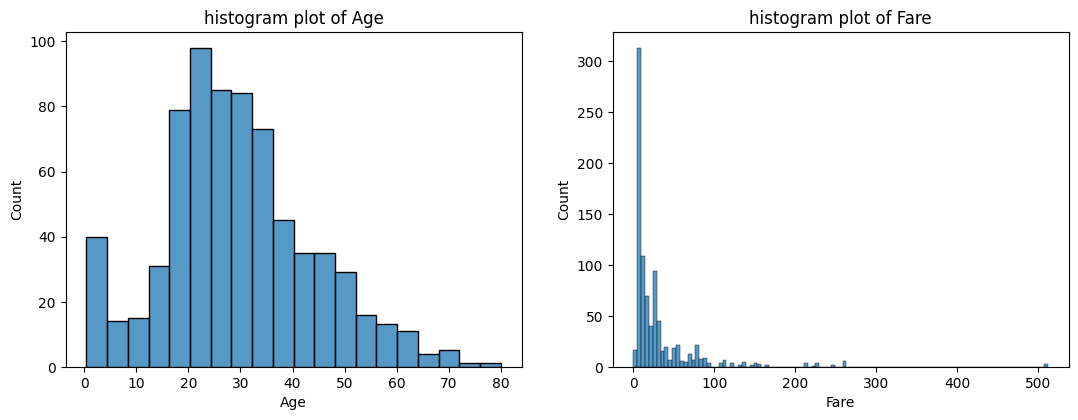

In [109]:
continuous_plot(df_train , df_train.columns , 10)

categorical feature with target

In [110]:
def categorical_plot_target(data , columns , target):
    total_cols = 3
    total_rows = math.ceil(len(columns) / total_cols)
    plt.figure(figsize = (20 , 5 * total_rows))
    plot_index = 1
    for column in columns:
        if  data[column].nunique() < 10:
            plt.subplot(total_rows , total_cols , plot_index)
            sns.countplot(x = data[column] , palette = "rocket" , hue = data [target])
            plt.title(f"count plot of {column} with survived")
            plot_index += 1
        else:
            print(f"column '{column}' is not categorical.")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

column 'PassengerId' is not categorical.
column 'Name' is not categorical.
column 'Age' is not categorical.
column 'Ticket' is not categorical.
column 'Fare' is not categorical.
column 'Cabin' is not categorical.


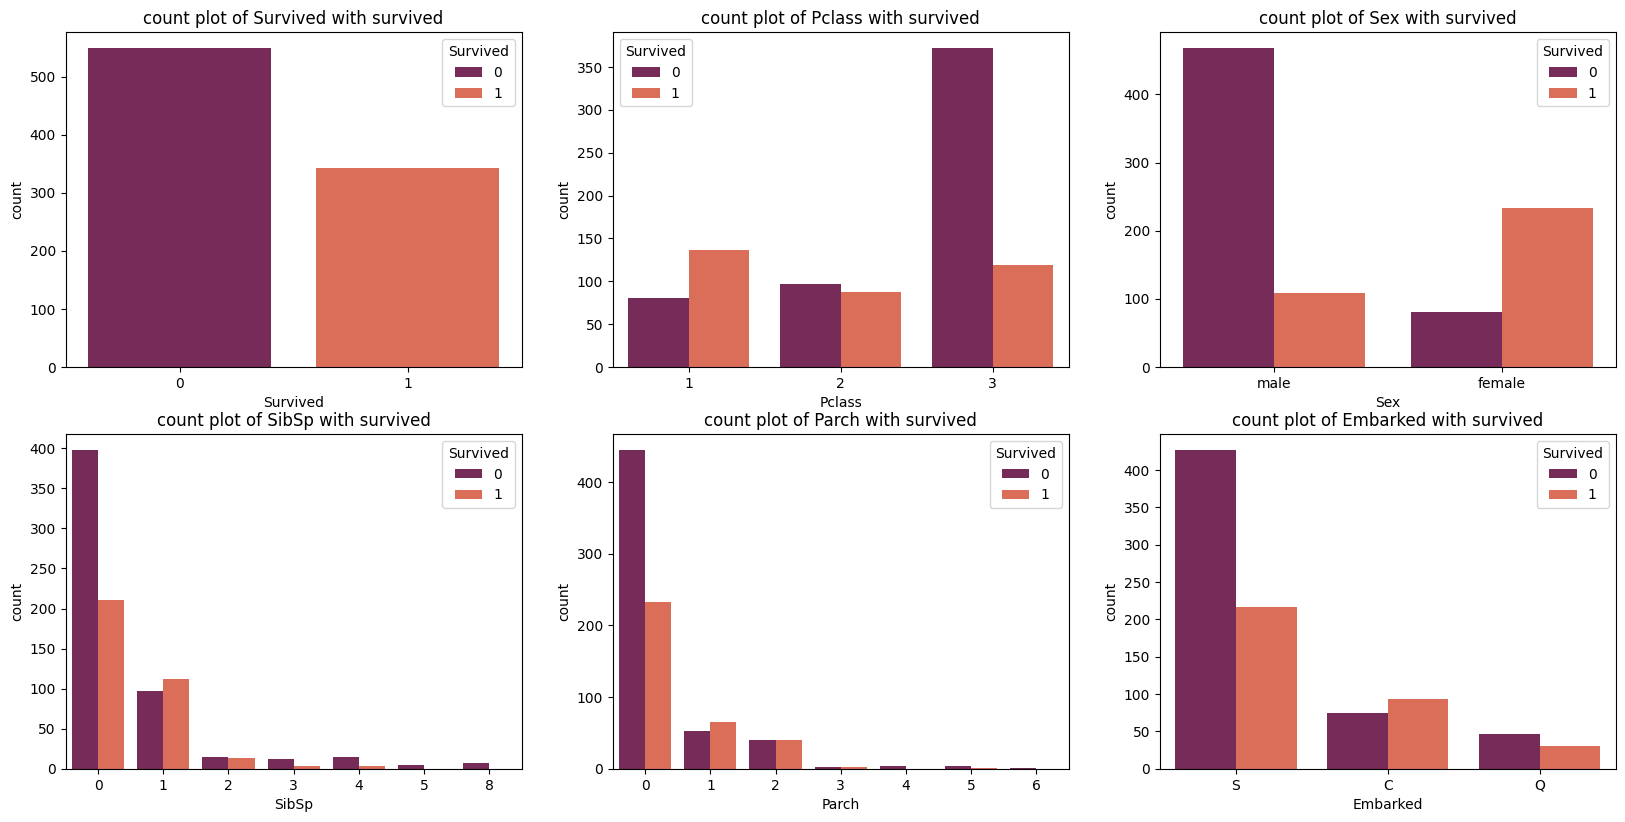

In [111]:
categorical_plot_target(df_train,df_train.columns,"Survived")



*   Many people died, approximately 60%.
*   Many people died, in class 3 and more survived in class 1.
*   Many people died from the male's category.
*   Many people died who had no children, also there are more survived people in the same bar .
*   
*   Many people died in the S area.


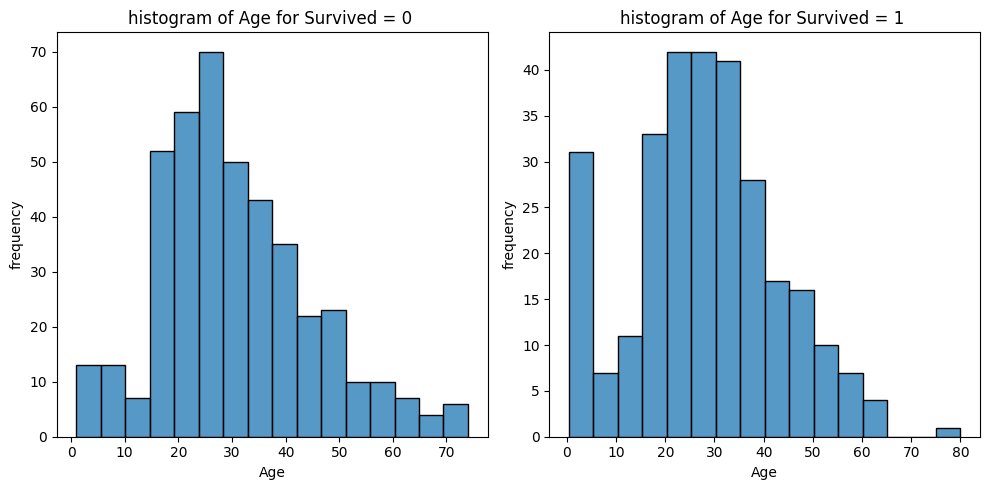

In [112]:
import matplotlib.pyplot as plt
#group by "Survived" column and select the "Age" column.
df_train_grouped = df_train.groupby("Survived")["Age"]
plt.figure(figsize = (10 , 5))
#plot for survived = 0
plt.subplot(1 , 2 , 1)
sns.histplot(df_train_grouped.get_group(0))
plt.xlabel("Age")
plt.ylabel("frequency")
plt.title("histogram of Age for Survived = 0 ")

#plot for survived = 1
plt.subplot(1 , 2 , 2)
sns.histplot(df_train_grouped.get_group(1))
plt.xlabel("Age")
plt.ylabel("frequency")
plt.title("histogram of Age for Survived = 1 ")

plt.tight_layout()
plt.show()

**correlation**

In [113]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


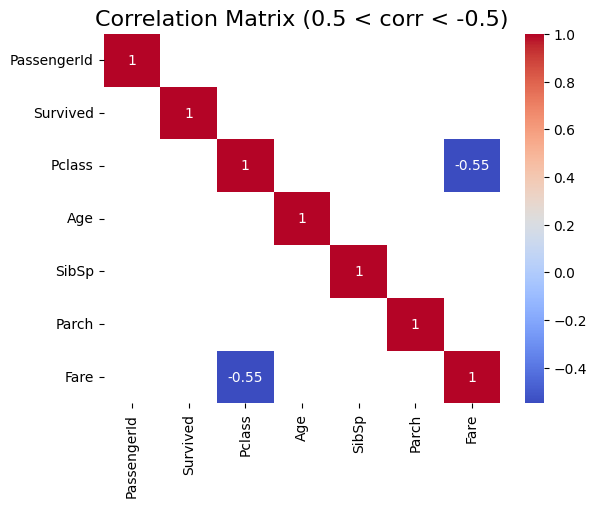

In [114]:
correlation_matrix = df_train.corr(numeric_only=True)
mask = (correlation_matrix < 0.5) & (correlation_matrix > -0.5)

# Plot the heatmap with the masked values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix (0.5 < corr < -0.5)', fontsize=16)
plt.show()

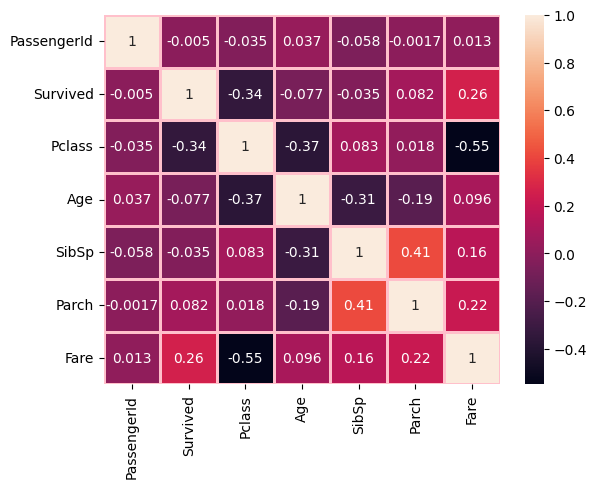

In [115]:
corr = df_train.corr(numeric_only=True)
sns.heatmap( corr , annot=True , linewidths=1 , cmap = "rocket" , linecolor= "pink");


<Axes: xlabel='Pclass', ylabel='Age'>

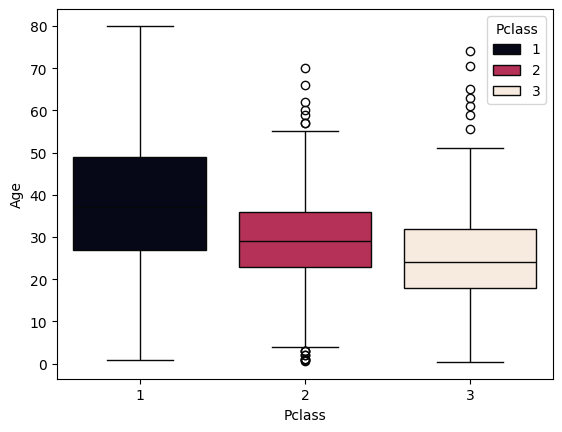

In [116]:
# Create the boxplot
sns.boxplot(x="Pclass", y="Age", data = df_train, hue="Pclass", palette="rocket")



* many people in class 1 between 28 to 50 years .
* many people in class 2 between 22 to 35 years .
* many people in class 3 between 18 to 30 years .



# detected the outliers

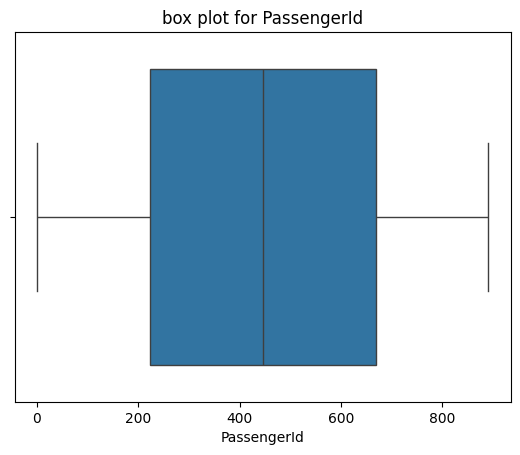

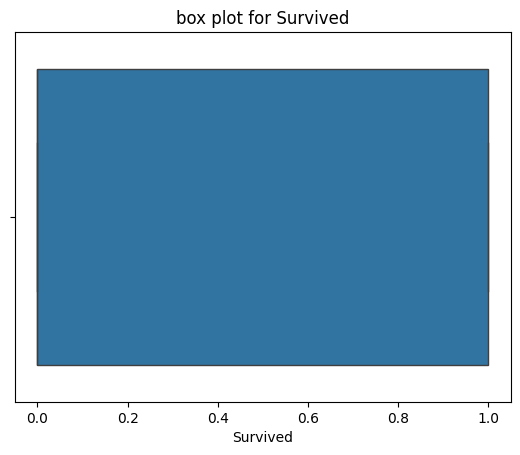

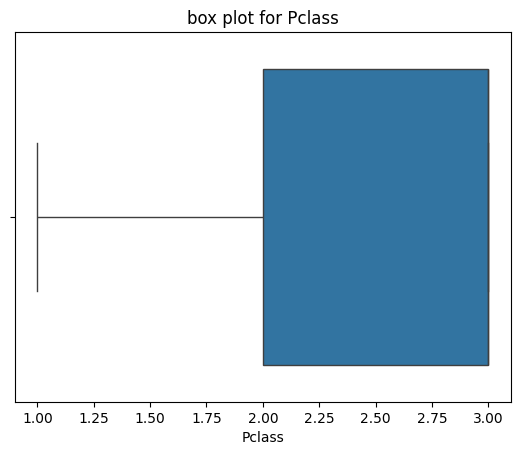

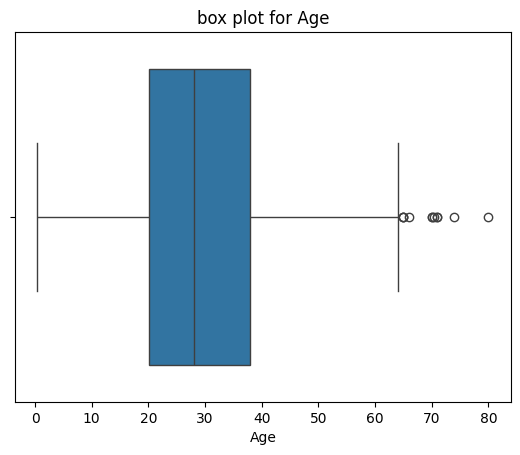

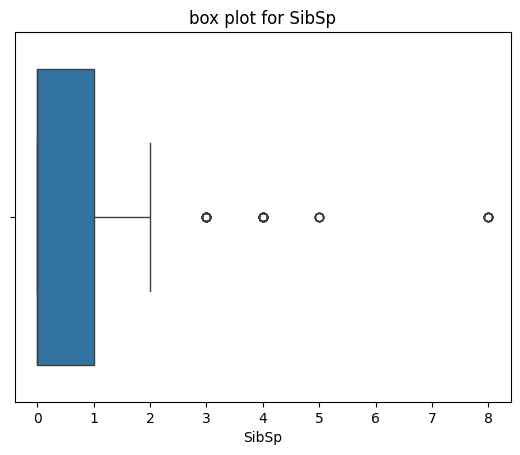

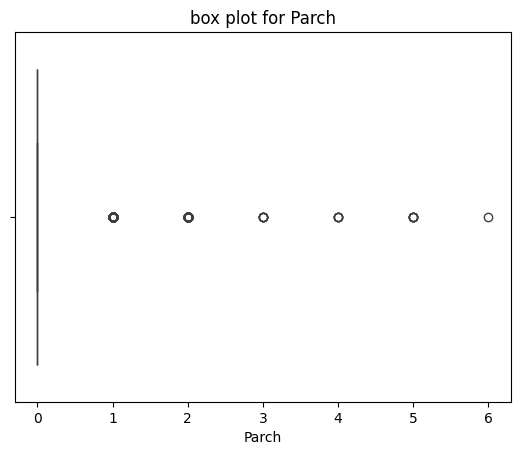

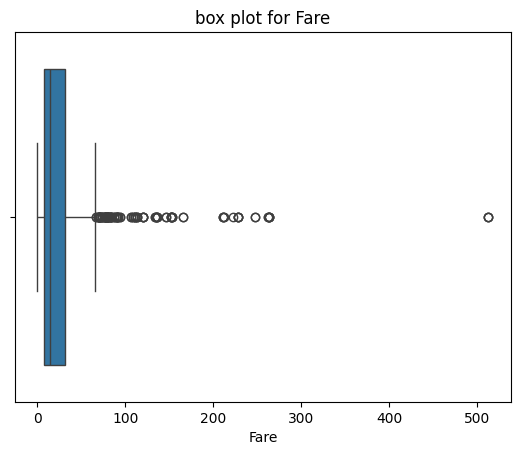

In [117]:
# making box plot for all numerical column
numeric_columns=df_train.select_dtypes(include=['number'])
for column in numeric_columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"box plot for {column}")
  plt.show()

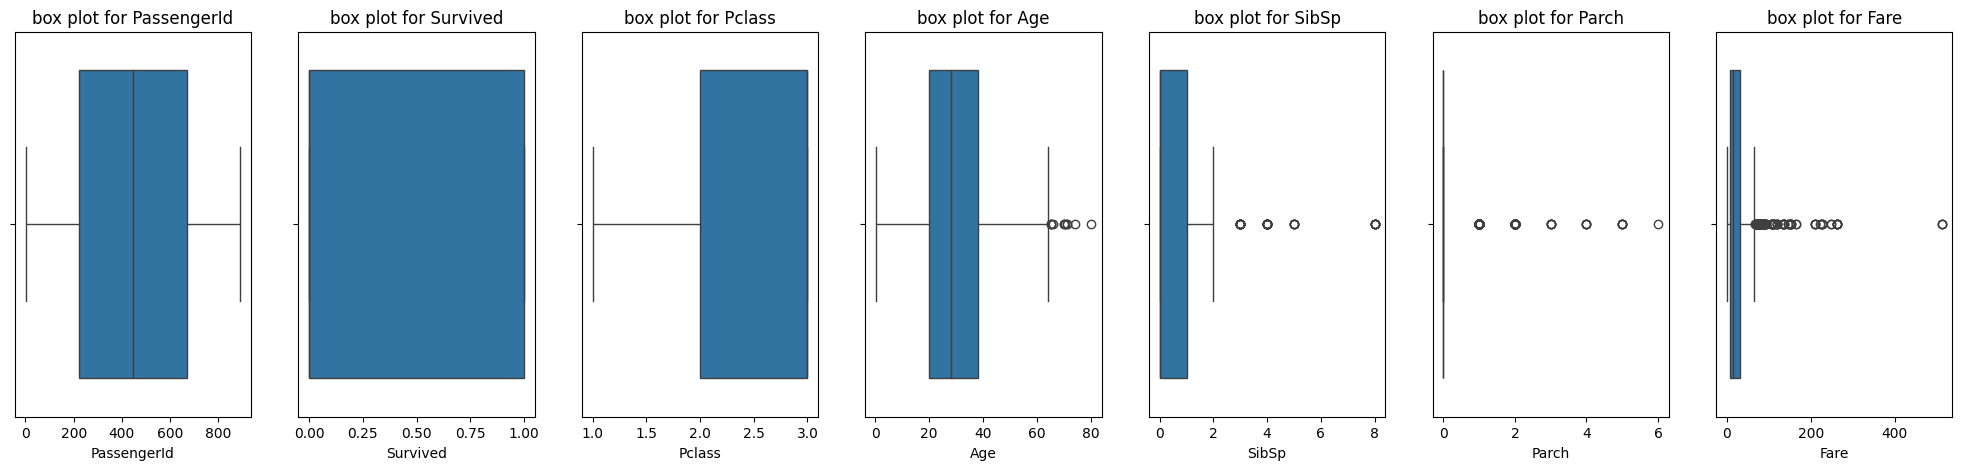

In [118]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include = ['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize = (25 , 5))
    for i , column in enumerate(numeric_columns.columns):
        plt.subplot(1 , num_cols , i + 1)
        sns.boxplot(x = numeric_columns[column])
        plt.title(f'box plot for {column}')
boxplot_numeric_columns(df_train)

# Step 2 : Data cleaning


# handling missing values


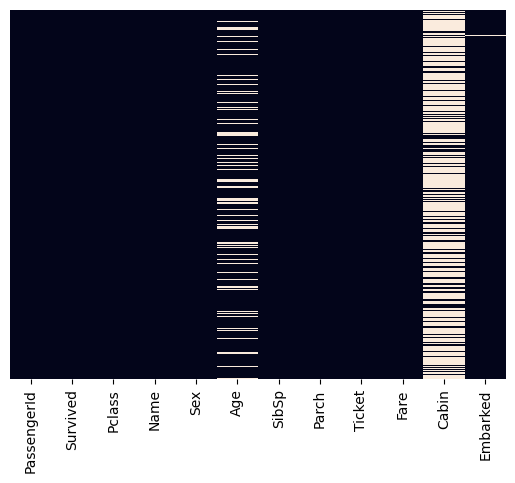

In [119]:
 sns.heatmap(df_train.isnull() , yticklabels = False , cbar = False , cmap = "rocket");

Cabin column has too much missing values more than 70% , so we can drop it

**Cabin column**

In [120]:
df_train.drop("Cabin" , axis = 1 , inplace = True)

In [121]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


**Age column**

In [122]:
#all the missing values in Age column .
df_train[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [123]:
#get the median of every class in the Age column .
print("training data is :")
print("the median age of people in first class : " , df_train[df_train['Pclass']==1]['Age'].median())
print("the median age of people in second class : " , df_train[df_train['Pclass']==2]['Age'].median())
print("the median age of people in third class : " , df_train[df_train['Pclass']==3]['Age'].median())

training data is :
the median age of people in first class :  37.0
the median age of people in second class :  29.0
the median age of people in third class :  24.0


In [124]:
# fill the missing values in every class by his median .
median_age_class_1 = df_train[df_train['Pclass']==1]['Age'].median()
median_age_class_2 = df_train[df_train['Pclass']==2]['Age'].median()
median_age_class_3 = df_train[df_train['Pclass']==3]['Age'].median()



In [125]:
df_train.loc[df_train['Pclass']==1 ,'Age'] = df_train[df_train['Pclass']==1 ]['Age'].fillna(median_age_class_1)
df_train.loc[df_train['Pclass']==2 ,'Age'] = df_train[df_train['Pclass']==2 ]['Age'].fillna(median_age_class_2)
df_train.loc[df_train['Pclass']==3 ,'Age'] = df_train[df_train['Pclass']==3 ]['Age'].fillna(median_age_class_3)

In [126]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [127]:
df_train["Age"].isnull().sum()

0

In [128]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [129]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [130]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [131]:
df_train["Embarked"].isnull().sum()

0

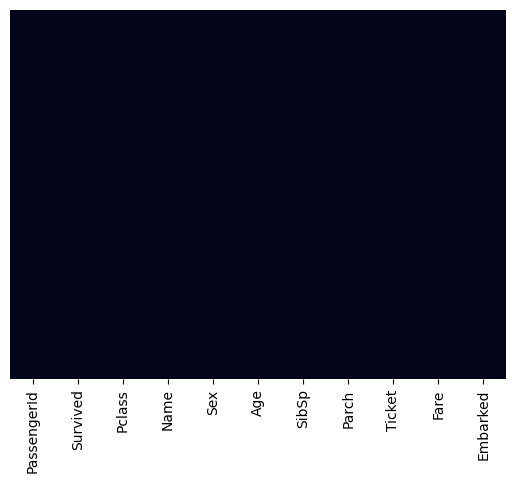

In [132]:
sns.heatmap(df_train.isnull() , yticklabels=False , cbar=False , cmap= "rocket");

**there is no any missing values after** **we handling it.**

# Duplicated values

In [133]:
# drop the "PassengerId" and "Name" columns then calculates the total number of duplicated rows .
df_train.drop(["PassengerId","Name"],axis=1).duplicated().sum()

15

In [134]:
index = df_train[df_train.drop(["PassengerId","Name"], axis = 1).duplicated()].index

In [135]:
# drop the index column
df_train.drop(index , axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [136]:
df_train.duplicated().sum()

0

defferent way to deal with duplicated values and dropping the columns .

In [137]:
def drop_duplicat(data , columns_uniques):
    index = data[data.drop(columns_uniques , axis = 1).duplicated()].index
    print("Number of duplicated rows is : ", len(index))
    return data.drop(index , axis = 0)

In [138]:
df_train = drop_duplicat(df_train , columns_uniques=['PassengerId','Name'])

Number of duplicated rows is :  15


In [139]:
df_train.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [140]:
df_train = df_train.reset_index(drop = True)

In [141]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Outlier Detection (IQR)

In [142]:
q1 , q3 = df_train['Age'].quantile([0.25 , 0.75])
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr


In [143]:
outliers = df_train[(df_train['Age']>upper_limit) | (df_train['Age']<lower_limit)].index
outliers

Int64Index([ 33,  54,  96, 116, 170, 251, 274, 279, 324, 364, 434, 452, 478,
            487, 539, 549, 564, 581, 618, 623, 663, 675, 684, 734, 817, 837],
           dtype='int64')

In [144]:
df_train.drop(outliers , axis = 0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
873,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
874,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [145]:
df_train[~(df_train['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
...,...,...,...,...,...,...,...,...,...,...,...
860,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C
864,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
865,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
872,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [146]:
def remove_outliers_iqr_countinuous(data , columns):
    for col in columns:
        if data[col].dtype != 'object':
           q1 , q3 = data[col].quantile([0.25 , 0.75])
           iqr = q3 - q1
           lower_limit , upper_limit = q1 - 1.5 * iqr , q3 + 1.5 * iqr
           filt=(data[col]<lower_limit) | (data[col]>upper_limit)
           data = data[~filt]
    return data.reset_index(drop = True)

In [147]:
df_train = remove_outliers_iqr_countinuous(df_train , ['Fare'])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Outlier (Z score)

In [148]:
def remove_outliers_z_countinuous(data , upper_threshod = 3 , lower_threshold = -3):
    feature = data.select_dtypes(np.number).columns
    skewness = data[feature].skew()
    print(skewness)
    for column in feature:
        if -0.5 <= skewness[column] <= 0.5 :
           z_scores = (data[column] - data[column].mean()) / data[column].std()
           outliers =(z_scores <lower_threshold ) | (z_scores >upper_limit)
           data = data[~outliers]
    return data.reset_index(drop = True)

In [149]:
remove_outliers_z_countinuous(df_train)

PassengerId    0.008520
Survived       0.700169
Pclass        -1.025325
Age            0.588315
SibSp          2.854316
Parch          3.195721
Fare           1.419831
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
3,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
4,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
759,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
760,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
761,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
762,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# skewness

In [150]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [151]:
def skewness_log_square(data , numbers_of_cat_value):
  features = data.select_dtypes(np.number).columns
  for feature in features:
      if data[feature].nunique() <= numbers_of_cat_value:
          print(f"Categorical featuers {feature}")
          continue

      skewness = data[feature].skew()
      if skewness  > 0.5 :
        transformation = np.log1p
        transformation_name = "log"
      elif skewness < -0.5 :
        transformation = np.square
        transformation_name = "square"
      else :
        print(f"Normal distibution {feature}")
        continue

      logTr = ColumnTransformer(transformers = [(transformation_name.lower(), FunctionTransformer(transformation),[feature])])
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      plt.title(f"distribution of {feature} before transformation" , fontsize = 15 )
      sns.histplot(data[feature], kde = True , color = "green")
      plt.subplot(1,2,2)

      df_transformed = pd.DataFrame(logTr.fit_transform(data))
      plt.title(f"Distribution of {feature} after transformation" , fontsize = 15)
      sns.histplot(df_transformed, bins = 20 , kde = True ,legend = False)
      plt.xlabel(feature)
      plt.show()

      print(f"Skewness was {round(data[feature].skew(), 5)} before & is {round(df_transformed[0].skew())} after log transformation ")
      data[feature] = df_transformed[0]
  return data

Normal distibution PassengerId
Categorical featuers Survived
Categorical featuers Pclass


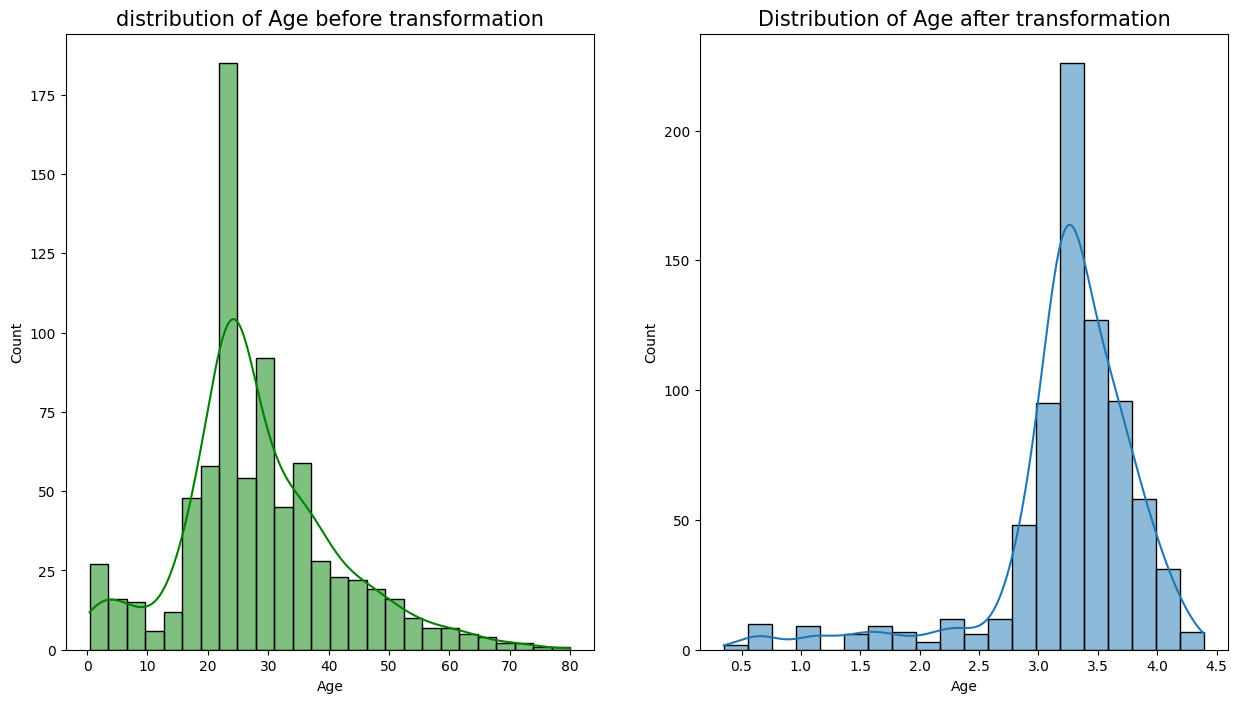

Skewness was 0.58832 before & is -2 after log transformation 
Categorical featuers SibSp
Categorical featuers Parch


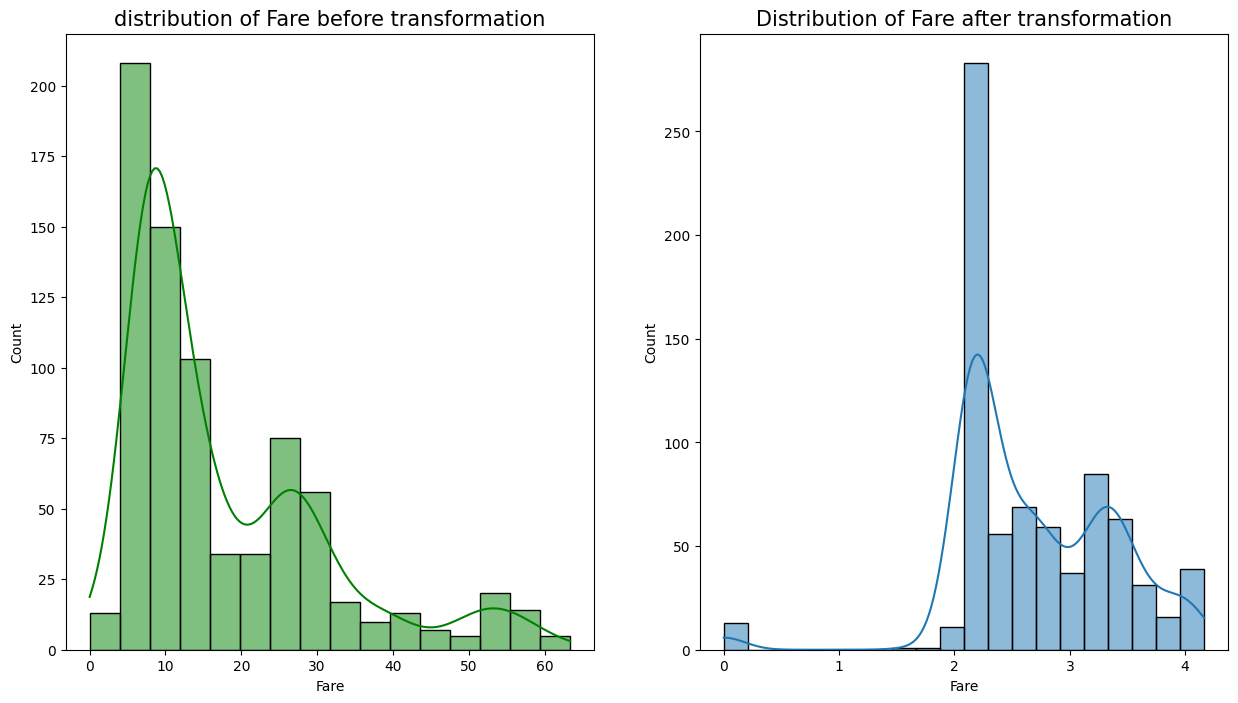

Skewness was 1.41983 before & is 0 after log transformation 


In [152]:
df_train = skewness_log_square(df_train , 10)

# removing irrelevant columns

In [153]:
df_train.drop(["PassengerId" , "Name"] , axis = 1 , inplace = True)

In [154]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,3.135494,1,0,A/5 21171,2.110213,S
1,1,3,female,3.295837,0,0,STON/O2. 3101282,2.188856,S
2,1,1,female,3.583519,1,0,113803,3.990834,S
3,0,3,male,3.583519,0,0,373450,2.202765,S
4,0,3,male,3.218876,0,0,330877,2.246893,Q
...,...,...,...,...,...,...,...,...,...
759,0,2,male,3.332205,0,0,211536,2.639057,S
760,1,1,female,2.995732,0,0,112053,3.433987,S
761,0,3,female,3.218876,1,2,W./C. 6607,3.196630,S
762,1,1,male,3.295837,0,0,111369,3.433987,C


# encoding categorical columns

# we will use dummy encoder with Embarked column and Sex with ordinal encoder

In [155]:
#this code preprocesses categorical variables ('Sex' and 'Embarked') in a DataFrame
#for machine learning tasks by performing ordinal encoding on 'Sex' and
#creating dummy variables for 'Embarked'.
# It also drops unnecessary columns ('Embarked' and 'Ticket') from the DataFrame.
from sklearn.preprocessing import OrdinalEncoder
df_train['Sex'] = df_train['Sex'].astype('object')
#the male equuals 0 and female equals 1
rank = list(df_train['Sex'].value_counts().index)
ordinal_encoder = OrdinalEncoder(categories=[rank])
df_train['Sex'] = ordinal_encoder.fit_transform(df_train[['Sex']])
df_train_get_dummies = pd.get_dummies(df_train['Embarked'],drop_first = True)
df = pd.concat([df_train , df_train_get_dummies] , axis = 1)
#here we drop the columns
df.drop(['Embarked' , 'Ticket'] , axis = 1 , inplace = True)

In [156]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0.0,3.135494,1,0,2.110213,0,1
1,1,3,1.0,3.295837,0,0,2.188856,0,1
2,1,1,1.0,3.583519,1,0,3.990834,0,1
3,0,3,0.0,3.583519,0,0,2.202765,0,1
4,0,3,0.0,3.218876,0,0,2.246893,1,0
...,...,...,...,...,...,...,...,...,...
759,0,2,0.0,3.332205,0,0,2.639057,0,1
760,1,1,1.0,2.995732,0,0,3.433987,0,1
761,0,3,1.0,3.218876,1,2,3.196630,0,1
762,1,1,0.0,3.295837,0,0,3.433987,0,0


# split dataset into training and test set

In [157]:
from sklearn.model_selection import train_test_split
x = df.drop(['Survived'] , axis = 1 )
y = df['Survived']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 42)

# feature scaling

In [158]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
x_train_scaler = rob_scaler.fit_transform(x_train)
x_test_scaler = rob_scaler.transform(x_test)

In [159]:
x_test_scaler

array([[-1.        ,  0.        ,  0.28653858, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.6535118 , ..., -0.00807801,
         0.        , -1.        ],
       [ 0.        ,  0.        , -0.52125301, ..., -0.2299281 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  0.7088246 , ..., -0.25163824,
         0.        ,  0.        ],
       [-2.        ,  0.        ,  0.7088246 , ...,  0.85066889,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -2.06011044, ...,  0.65280729,
         0.        ,  0.        ]])

In [160]:
### i don't have the test dataset
#df_test = pd.read( " ### test file .extension "  )

In [161]:
#df_test